# Deep Learning Bootcamp November 2017, GPU Computing for Data Scientists

<img src="../images/bcamp.png" align="center">

## 13  PyTorch Logistic Regression 

Web: https://www.meetup.com/Tel-Aviv-Deep-Learning-Bootcamp/events/241762893/

Notebooks: <a href="https://github.com/QuantScientist/Data-Science-PyCUDA-GPU"> On GitHub</a>

*Shlomo Kashani*

<img src="../images/pt.jpg" width="35%" align="center">


# PyTorch Imports


In [252]:
# !pip install pycuda
%reset -f
import numpy
import numpy as np
from __future__ import print_function
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from sklearn.preprocessing import MultiLabelBinarizer
import time
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots
import tensorflow as tf 
print("tensorflow:" + tf.__version__)
!set "KERAS_BACKEND=tensorflow"
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')

# !pip install http://download.pytorch.org/whl/cu75/torch-0.2.0.post1-cp27-cp27mu-manylinux1_x86_64.whl
# !pip install torchvision 
# ! pip install cv2
# import cv2

tensorflow:1.2.1
__Python VERSION: 2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]
__pyTorch VERSION: 0.1.12+4eb448a
__CUDA VERSION
__CUDNN VERSION: 5110
__Number CUDA Devices: 1
__Devices


#  Load a CSV file for Binary classification

In [253]:
% reset -f

# ! pip install tables

import torch
from torch.autograd import Variable
import numpy as np
import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import logging
handler=logging.basicConfig(level=logging.INFO)
lgr = logging.getLogger(__name__)

%matplotlib inline


F_NAME_TRAIN= 'data-03-diabetes.csv'
# F_NAME_TRAIN='numerai/numerai_training_data.csv'

# X_df_train= pd.read_csv(F_NAME_TRAIN)
X_df_train= pd.read_csv(F_NAME_TRAIN,header=None, dtype=np.float32)
X_df_train_SINGLE=X_df_train.copy(deep=True)   


# X_df_train_SINGLE.drop('id', axis=1, inplace=True)
# X_df_train_SINGLE.drop('era', axis=1, inplace=True)
# X_df_train_SINGLE.drop('data_type', axis=1, inplace=True)
# drop the header
# X_df_train_SINGLE.to_csv('numerai/numerai_training_data_clean.csv', header=False)
# X_df_train_SINGLE= pd.read_csv('numerai/numerai_training_data_clean.csv', header=None, dtype=np.float32)

# X_df_train_SINGLE=X_df_train_SINGLE.dropna()
    
answers_1_SINGLE = list (X_df_train_SINGLE[X_df_train_SINGLE.columns[-1]].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)
X_df_train_SINGLE = X_df_train_SINGLE.drop(X_df_train_SINGLE.columns[-1], axis=1)
# X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))  

print(X_df_train_SINGLE.shape)
X_df_train_SINGLE.head(5)

# (np.where(np.isnan(X_df_train_SINGLE)))
# (np.where(np.isinf(X_df_train_SINGLE)))

X_df_train_SINGLE.info()

(759, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 8 columns):
0    759 non-null float32
1    759 non-null float32
2    759 non-null float32
3    759 non-null float32
4    759 non-null float32
5    759 non-null float32
6    759 non-null float32
7    759 non-null float32
dtypes: float32(8)
memory usage: 29.6 KB


#  Create PyTorch GPU tensors

- Note how we transfrom the np arrays

In [255]:
use_cuda = False
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor


# fix seed
seed=17*19
np.random.seed(seed)
torch.manual_seed(seed)
if use_cuda:
    torch.cuda.manual_seed(seed)
        

# sk learn
trainX, testX, trainY, testY = train_test_split(X_df_train_SINGLE, answers_1_SINGLE, test_size=.33, random_state=999)  

# Train data
x_data_np = np.array(trainX.values, dtype=np.float32)
y_data_np = np.array(trainY, dtype=np.float32)
y_data_np=y_data_np.reshape((y_data_np.shape[0],1)) # Must be reshaped for PyTorch!


print(x_data_np.shape, y_data_np.shape)
print(type(x_data_np), type(y_data_np))

if use_cuda:
    lgr.info ("Using the GPU")    
    X = Variable(torch.from_numpy(x_data_np).cuda()) # Note the conversion for pytorch
    Y = Variable(torch.from_numpy(y_data_np).cuda())
else:
    lgr.info ("Using the CPU")
    X = Variable(torch.from_numpy(x_data_np)) # Note the conversion for pytorch
    Y = Variable(torch.from_numpy(y_data_np))    
print(type(X.data), type(Y.data)) # should be 'torch.cuda.FloatTensor'
    
print(type(X.data), type(Y.data)) # should be 'torch.cuda.FloatTensor'

INFO:__main__:Using the CPU


(508, 8) (508, 1)
<type 'numpy.ndarray'> <type 'numpy.ndarray'>
<class 'torch.FloatTensor'> <class 'torch.LongTensor'>
<class 'torch.FloatTensor'> <class 'torch.LongTensor'>


#  Define the NN model

- First a simple two leyer network and then a more involved version

#  Initial weights selection

- There are many ways to select the initial weights to a neural network architecture. A common initialization scheme is random initialization, which sets the biases and weights of all the nodes in each hidden layer randomly, so they are in a random point of the space, and objective function, and then find a nearby local minima using an algorithm like SGD or Adam.
- We use a *xavier initializer*, in effect (according to theory) initializing the weights of the network to values that would be closer to the optimal, and therefore require less epochs to train.

### References: 
* **`nninit.xavier_uniform(tensor, gain=1)`** - Fills `tensor` with values according to the method described in ["Understanding the difficulty of training deep feedforward neural networks" - Glorot, X. and Bengio, Y.](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf), using a uniform distribution.
* **`nninit.xavier_normal(tensor, gain=1)`** - Fills `tensor` with values according to the method described in ["Understanding the difficulty of training deep feedforward neural networks" - Glorot, X. and Bengio, Y.](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf), using a normal distribution.
* **`nninit.kaiming_uniform(tensor, gain=1)`** - Fills `tensor` with values according to the method described in ["Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification" - He, K. et al.](https://arxiv.org/abs/1502.01852) using a uniform distribution.
* **`nninit.kaiming_normal(tensor, gain=1)`** - Fills `tensor` with values according to the method described in ["Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification" - He, K. et al.]


In [256]:
keep_prob=0.85
# p is the probability of being dropped in PyTorch
dropout = torch.nn.Dropout(p=1 - keep_prob)


# hiddenLayer1Size=32
# hiddenLayer2Size=16
# # # Hypothesis using sigmoid
# linear1=torch.nn.Linear(x_data_np.shape[1], hiddenLayer1Size, bias=True) # size mismatch, m1: [5373 x 344], m2: [8 x 1] at /pytorch/torch/lib/TH/generic/THTensorMath.c:1293
# # xavier initializer
# torch.nn.init.xavier_uniform(linear1.weight)
# linear2=torch.nn.Linear(hiddenLayer1Size, hiddenLayer2Size)
# # xavier initializer
# torch.nn.init.xavier_uniform(linear2.weight)
# linear3=torch.nn.Linear(hiddenLayer2Size, 1)
# # xavier initializer
# torch.nn.init.xavier_uniform(linear3.weight)
# sigmoid = torch.nn.Sigmoid()
# tanh=torch.nn.Tanh()
# model = torch.nn.Sequential(linear1,dropout, tanh, linear2,dropout, tanh, linear3,dropout, sigmoid)


#Hypothesis using sigmoid
linear1=torch.nn.Linear(x_data_np.shape[1], 1, bias=True) 
# xavier initializer
torch.nn.init.xavier_uniform(linear1.weight)
sigmoid = torch.nn.Sigmoid()
# model = torch.nn.Sequential(linear1,dropout, sigmoid)
model = torch.nn.Sequential(linear1, sigmoid)

if use_cuda:
    lgr.info ("Using the GPU")
    model = model.cuda() # On GPU
else:
    lgr.info ("Using the CPU")   

lgr.info('Model {}'.format(model))

INFO:__main__:Using the CPU
INFO:__main__:Model Sequential (
  (0): Linear (8 -> 1)
  (1): Sigmoid ()
)


In [257]:
# see https://github.com/facebookresearch/SentEval/blob/master/senteval/tools/classifier.py
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-1,momentum=0.9, weight_decay=1e-4)
# optimizer = torch.optim.Adam(model.parameters())
lgr.info('Optimizer {}'.format(optimizer))

INFO:__main__:Optimizer <torch.optim.sgd.SGD object at 0x7fc855dbc350>


# The cross-entropy loss function


A binary cross-entropy `Criterion` (which expects 0 or 1 valued targets) :

```lua
criterion = nn.BCECriterion()
``` 

The BCE loss is defined as :

<img src="../images/bce2.png" align="center">


In [258]:
import sympy as sp
sp.interactive.printing.init_printing(use_latex=True)
from IPython.display import display, Math, Latex
maths = lambda s: display(Math(s))
latex = lambda s: display(Latex(s))

#the loss function is as follows:
maths("\mathbf{Loss Function:} J(x, z) = -\sum_k^d[x_k \log z_k + (1-x_k)log(1-z_k)]")

<IPython.core.display.Math object>

# Start training in Batches


In [259]:
import time
start_time = time.time()    
epochs=20000
all_losses = []


for step in range(epochs):
    optimizer.zero_grad()
    hypothesis = model(X)    
    # cost/loss function
    cost = -(Y * torch.log(hypothesis) + (1 - Y)
             * torch.log(1 - hypothesis)).mean()
    cost.backward()
    optimizer.step()

    # Keep loss 
    if step % 150 == 0:
        loss = cost.data[0]
        all_losses.append(loss)
        
    if step % 4000 == 0:
        print(step, cost.data.cpu().numpy())
        # RuntimeError: can't convert CUDA tensor to numpy (it doesn't support GPU arrays). 
        # Use .cpu() to move the tensor to host memory first.
        predicted = (model(X).data > 0.5).float()
#         predicted = (model(X).data ).float() # This is like predict proba
        predictions=predicted.cpu().numpy()
        accuracy = (predicted == Y.data).float().mean()
        print('TRAINNING Accuracy:' + str(accuracy))
#         print ('TRAINING LOG_LOSS=' + str(log_loss(trainY, predictions)))
#         R_SCORE=roc_auc_score(Y.data.cpu().numpy(),predictions )        
#         print ('TRAINING ROC AUC:' + str(R_SCORE))
                
end_time = time.time()
print ('{} {:6.3f} seconds'.format('GPU:', end_time-start_time))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.show()

TypeError: mul received an invalid combination of arguments - got (torch.FloatTensor), but expected one of:
 * (int value)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.FloatTensor[0m)
 * (torch.LongTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.FloatTensor[0m)


# Cross validation, metrics, ROC_AUC etc

INFO:__main__:Using the CPU


(251, 8) (251, 1)
<type 'numpy.ndarray'> <type 'numpy.ndarray'>
VALIDATION ROC AUC:0.849965493444


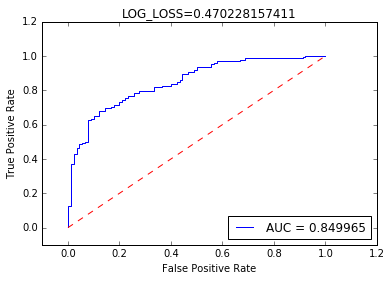

In [242]:
model.eval()

# Validation data
x_data_np_val = np.array(testX.values, dtype=np.float32)
y_data_np_val = np.array(testY, dtype=np.float32)
y_data_np_val=y_data_np_val.reshape((y_data_np_val.shape[0],1)) # Must be reshaped for PyTorch!


print(x_data_np_val.shape, y_data_np_val.shape)
print(type(x_data_np_val), type(y_data_np_val))

if use_cuda:
    lgr.info ("Using the GPU")    
    X_val = Variable(torch.from_numpy(x_data_np_val).cuda()) # Note the conversion for pytorch
    Y_val = Variable(torch.from_numpy(y_data_np_val).cuda())
else:
    lgr.info ("Using the CPU")
    X_val = Variable(torch.from_numpy(x_data_np_val)) # Note the conversion for pytorch
    Y_val = Variable(torch.from_numpy(y_data_np_val))

# VALIDATION
predicted_val = (model(X_val).data).float()
predictions_val=predicted_val.cpu().numpy()
accuracy_val = (predicted_val == Y_val.data).float().mean()
R_SCORE_VAL=roc_auc_score(Y_val.data.cpu().numpy(),predictions_val)        
print ('VALIDATION ROC AUC:' + str(R_SCORE_VAL))


false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, predictions_val)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('LOG_LOSS=' + str(log_loss(testY, predictions_val)))
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.6f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Lab 5 Logistic Regression Classifier
import torch
from torch.autograd import Variable
import numpy as np

torch.manual_seed(777)  # for reproducibility

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, y_data.shape)

X = Variable(torch.from_numpy(x_data))
Y = Variable(torch.from_numpy(y_data))

# Hypothesis using sigmoid
linear = torch.nn.Linear(8, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    # cost/loss function
    cost = -(Y * torch.log(hypothesis) + (1 - Y)
             * torch.log(1 - hypothesis)).mean()
    cost.backward()
    optimizer.step()

    if step % 200 == 0:
        print(step, cost.data.numpy())

# Accuracy computation
predicted = (model(X).data > 0.5).float()
accuracy = (predicted == Y.data).float().mean()
print("\nHypothesis: ", hypothesis.data.numpy(), "\nCorrect (Y): ", predicted.numpy(), "\nAccuracy: ", accuracy)